# Classifiation Task

## 1. Explanatory Data Analysis(EDA)

In [1]:
#Global Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ML Modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

#Setting up
sns.set(palette="coolwarm")

In [2]:
#Loading the dataset "CampanyBankuptcyData"
data = pd.read_csv('CompanyBankruptcyData.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
print("Shape: ", data.shape) # 6818 Data points, 96 features
data.describe()

Shape:  (6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Not a single null value and every field is numerical.

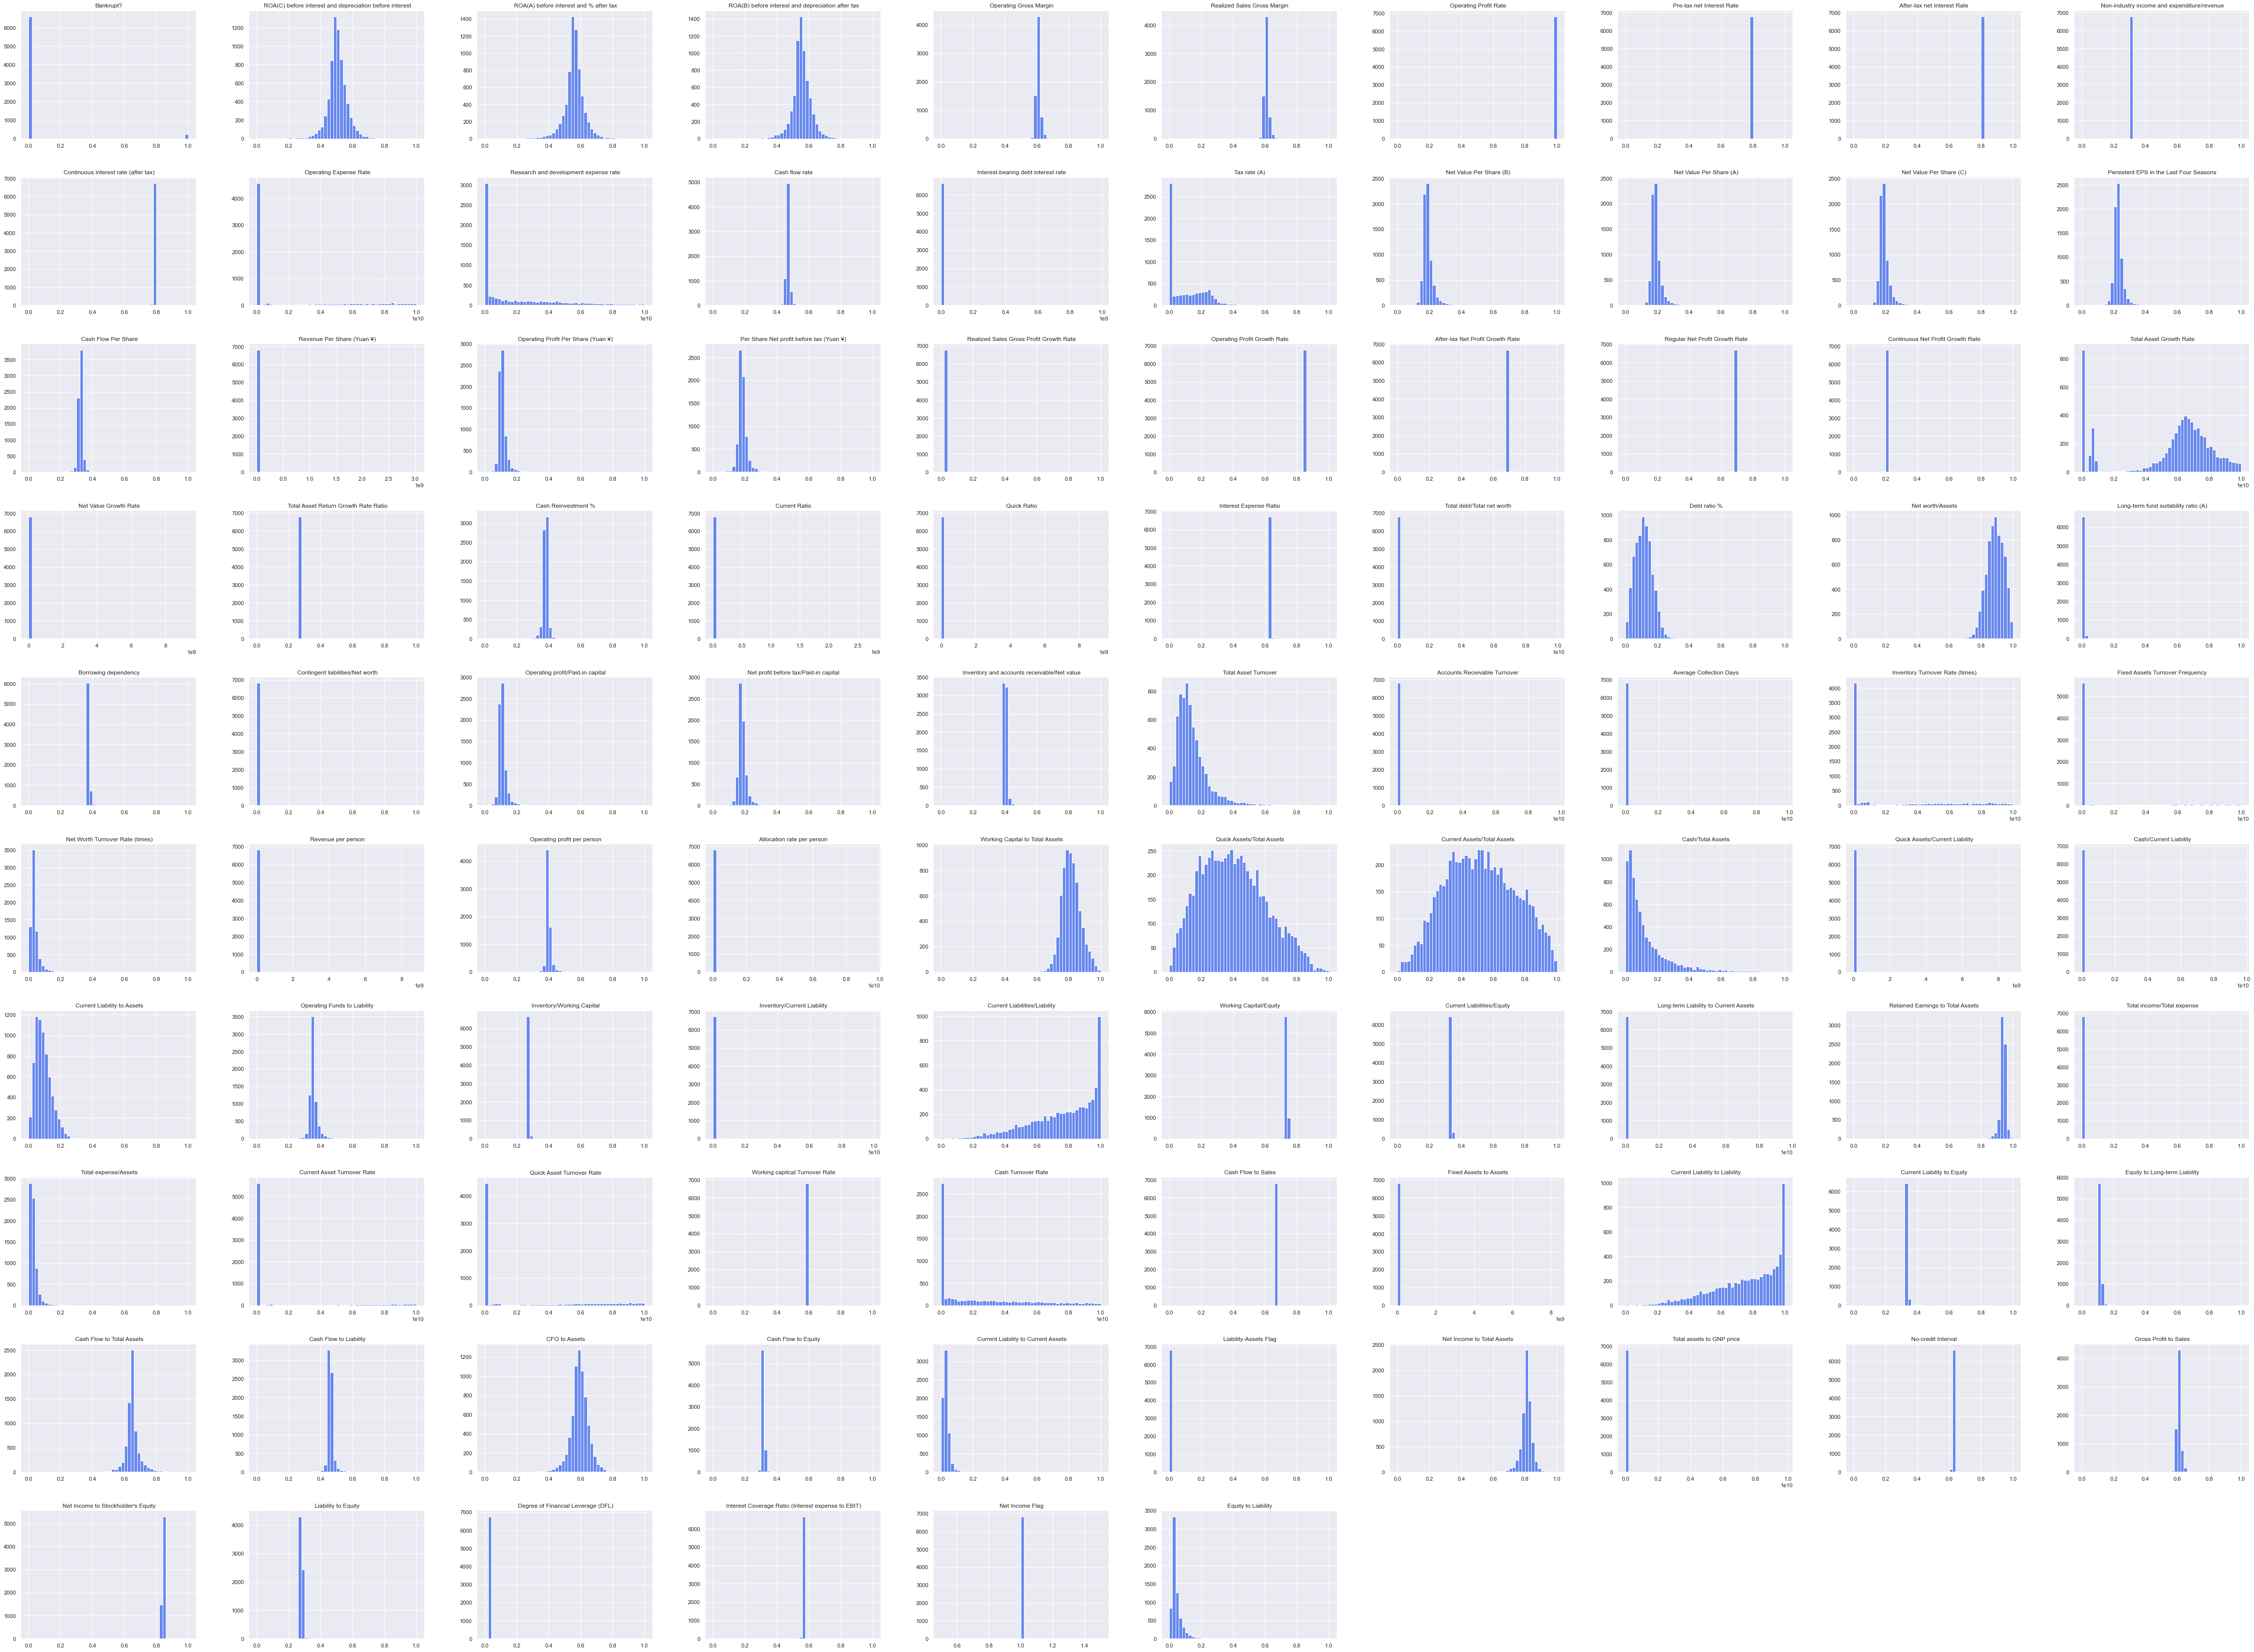

In [5]:
data.hist(figsize=(80, 60), bins=50)
plt.show()

# 2. Create a classification model using Decision Tree, Random Forest & Neural Networks

In [6]:
#Formatting the model prediction to be 0 or 1
def predict(model, X):
    return (model.predict(X) >= 0.5).astype('int')

#Accuracy 
def accuracy(model, X, y):
    return model.score(X, y)

In [7]:
#Splitting the data into a training set and test set
X_data = data.drop('Bankrupt?', axis=1)
y_data = data['Bankrupt?'].copy()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [8]:
#Standarizing Input
scaler = StandardScaler()

#Applying the scaler
X_train_prep = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_prep = pd.DataFrame(scaler.fit_transform(X_test), columns = X_train.columns)

###  A. Decision Tree Classifier

In [9]:
#Fitting the model to the data
tree_clf = DecisionTreeClassifier()
tree_model = tree_clf.fit(X_train_prep, y_train)

In [10]:
print("Prediction: ")
print("Training set: accuracy = ", accuracy(tree_model, X_train_prep, y_train))
print("Test set: accuracy = ", accuracy(tree_model, X_test_prep, y_test))

Prediction: 
Training set: accuracy =  1.0
Test set: accuracy =  0.782991202346041


### B. Random Forest Classifier

In [11]:
#Fitting the model to the data
rf_clf = RandomForestClassifier()
rf_model = rf_clf.fit(X_train_prep, y_train)

In [12]:
print("Prediction: ")
print("Training set: accuracy = ", accuracy(rf_model, X_train_prep, y_train))
print("Test set: accuracy = ", accuracy(rf_model, X_test_prep, y_test))

Prediction: 
Training set: accuracy =  1.0
Test set: accuracy =  0.9604105571847508


### C. Neural Networks 

In [13]:
n_layers = 4 #Number of layer
n_units = 300 #Number of units

model = Sequential()

#Using relu as activation function
#Dividing the number of units for each layer as n_units / i
for i in range(1, n_layers):
    model.add(Dense(n_units/i, activation="relu"))
    
#Using sigmoid activation function for the output layer
model.add(Dense(1, activation="sigmoid"))

#loss: binary crossentropy or log loss, opitimizer : stochastic gradien descent
model.compile(loss="binary_crossentropy", optimizer = "sgd", metrics=['accuracy'] )

In [14]:
#Training the model for 100
history = model.fit(X_train_prep, y_train, epochs=200, validation_data=(X_test, y_test), verbose=False)

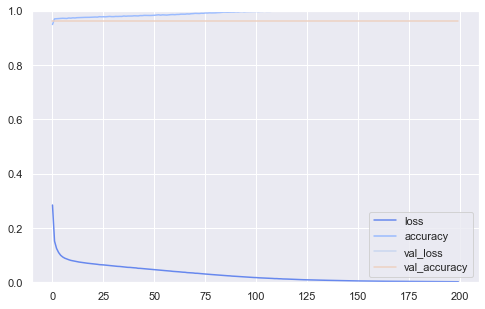

In [15]:
#Displaying the evolution of loss
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
#evaluating the training set
model.evaluate(X_train_prep, y_train)

171/171 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000


[0.0019215521169826388, 1.0]

In [17]:
#evaluating the test set
model.evaluate(X_test_prep, y_test)

43/43 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.9523


[0.5367908477783203, 0.9523460268974304]

In [18]:
#Showing some samples
y_train_pred = predict(model, X_train_prep)
y_test_pred = predict(model, X_test_prep)

In [19]:
y_test_pred[0:10]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [20]:
y_test[0:10]

239     0
2850    0
2687    0
6500    1
2684    0
3034    0
4697    0
2892    0
4001    0
681     0
Name: Bankrupt?, dtype: int64